In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# download necessary libraries and packages
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
# import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, MaxPool1D, Reshape

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [ ]:
import os
os.listdir('/content/drive/MyDrive/Colab Notebooks/PPGEE_DeepLearning/Project_01/dataset')

['test.csv', 'train.csv']

In [132]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPGEE_DeepLearning/Project_01/dataset/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPGEE_DeepLearning/Project_01/dataset/test.csv')

### Data Preprocessing, Feature Engineering and transformation

In [133]:
# checking the shape of the data

train.shape, test.shape

((76020, 371), (75818, 370))

In [134]:
# checking for null values
train.isnull().sum().sum() , test.isnull().sum().sum()

(0, 0)

In [135]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [136]:
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [137]:
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.43,6.00,4.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.55,3.00,2.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57.00,51.45,66.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.87,30.00,21.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


### Remove zeros


In [138]:
aux_num = train.nunique()
zero_drop = list(aux_num[aux_num[aux_num < 2].index].index)

In [139]:
train.drop(zero_drop, axis=1, inplace=True)

test.drop(zero_drop, axis=1, inplace=True)

### Remove ID and TARGET

In [140]:
# Let's remove ID column from both datasets and target column from train to make it a seperate series
y_train_full=train['TARGET']
x_train_full=train.drop(['ID', 'TARGET'], axis=1)
x_test_final=test.drop(['ID'], axis=1)

### Oversampling using SMOTE

In [141]:
# Checking shape before any action
x_train_full.shape, y_train_full.shape

((76020, 335), (76020,))

In [142]:
smt=SMOTE()
x_train_full, y_train_full = smt.fit_resample(x_train_full, y_train_full)

In [143]:
x_train_full.shape, y_train_full.shape

((146024, 335), (146024,))

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=42, stratify=y_train_full)

In [145]:
# checking the shape of the datasets
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_test_final.shape

((102216, 335), (102216,), (43808, 335), (43808,), (75818, 335))

### Feature selection methods: Filtering method

In [146]:
quasi_filter=VarianceThreshold(0.01)
x_train=quasi_filter.fit_transform(x_train)
x_test=quasi_filter.transform(x_test)
x_test_final=quasi_filter.transform(x_test_final)

In [147]:
x_train.shape, x_test.shape, x_test_final.shape

((102216, 255), (43808, 255), (75818, 255))

In [148]:
# Let's check duplicated features now

x_train_T=x_train.T
x_test_T = x_test.T
x_test_final_T=x_test_final.T

In [149]:
x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)
x_test_final_T=pd.DataFrame(x_test_final_T)

In [150]:
x_train_T.shape, x_test_T.shape, x_test_final_T.shape

((255, 102216), (255, 43808), (255, 75818))

In [151]:
x_train_T.duplicated().sum()

16

In [152]:
duplicated_features=x_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
250    False
251    False
252    False
253    False
254    False
Length: 255, dtype: bool

In [153]:
# features to keep will be inverse of duplicatd features
features_to_keep=[not index for index in duplicated_features]

In [154]:
print(len(features_to_keep))

255


In [155]:
x_train=x_train_T[features_to_keep].T
x_test=x_test_T[features_to_keep].T
x_test_final=x_test_final_T[features_to_keep].T

In [156]:
x_train.shape, x_test.shape, x_test_final.shape

((102216, 239), (43808, 239), (75818, 239))

In [157]:
# Transformation of the data now

sc=StandardScaler()
x_train_tx=sc.fit_transform(x_train)
x_test_tx=sc.transform(x_test)
x_test_final_tx=sc.transform(x_test_final)

In [158]:
# let's check the type of the dataset now
type(x_train_tx), type(x_test_tx), type(y_train), type(y_test), type(x_test_final_tx)

(numpy.ndarray,
 numpy.ndarray,
 pandas.core.series.Series,
 pandas.core.series.Series,
 numpy.ndarray)

In [159]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [160]:
type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [161]:
x_train_tx=x_train_tx.reshape(x_train_tx.shape[0], x_train_tx.shape[1], 1)
x_test_tx=x_test_tx.reshape(x_test_tx.shape[0], x_test_tx.shape[1], 1)
x_test_final_tx=x_test_final_tx.reshape(x_test_final_tx.shape[0], x_test_final_tx.shape[1], 1)

In [162]:
x_train_tx.shape[1]

239

### Build model

In [163]:
model=Sequential()
#model.add(BatchNormalization()(inp))
model.add(Dense(1120, input_shape=(x_train_tx.shape[1],)))
model.add(Reshape((70, 16)))

model.add(Conv1D(16, 5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))          

model.add(Conv1D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
          
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
          
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.4))
          
model.add(Dense(1, activation='sigmoid'))

In [164]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1120)              268800    
                                                                 
 reshape_11 (Reshape)        (None, 70, 16)            0         
                                                                 
 conv1d_27 (Conv1D)          (None, 66, 16)            1296      
                                                                 
 batch_normalization_36 (Bat  (None, 66, 16)           64        
 chNormalization)                                                
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 33, 16)           0         
 g1D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 33, 16)          

In [165]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

In [166]:
history=model.fit(x_train_tx, y_train, validation_data=(x_test_tx, y_test), epochs=10, verbose=1)

Epoch 1/10
3195/3195 [==============================] - 28s 8ms/step - loss: 0.3930 - auc: 0.9034 - val_loss: 0.3402 - val_auc: 0.9313
Epoch 2/10
3195/3195 [==============================] - 27s 8ms/step - loss: 0.3436 - auc: 0.9256 - val_loss: 0.3223 - val_auc: 0.9401
Epoch 3/10
3195/3195 [==============================] - 26s 8ms/step - loss: 0.3279 - auc: 0.9321 - val_loss: 0.3081 - val_auc: 0.9411
Epoch 4/10
3195/3195 [==============================] - 25s 8ms/step - loss: 0.3162 - auc: 0.9366 - val_loss: 0.2982 - val_auc: 0.9437
Epoch 5/10
3195/3195 [==============================] - 28s 9ms/step - loss: 0.3089 - auc: 0.9395 - val_loss: 0.2957 - val_auc: 0.9458
Epoch 6/10
3195/3195 [==============================] - 29s 9ms/step - loss: 0.3005 - auc: 0.9426 - val_loss: 0.2854 - val_auc: 0.9495
Epoch 7/10
3195/3195 [==============================] - 27s 8ms/step - loss: 0.2918 - auc: 0.9458 - val_loss: 0.2826 - val_auc: 0.9517
Epoch 8/10
3195/3195 [==============================] -

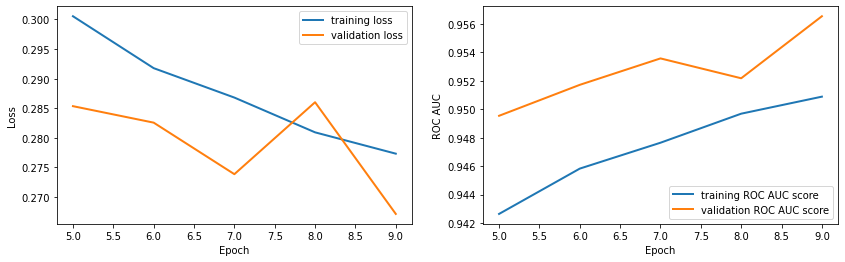

In [167]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [168]:
y_pred=model.predict(x_test_final_tx)

In [169]:
y_pred.shape

(75818, 1)

In [170]:
y_pred

array([[0.2457112 ],
       [0.33962744],
       [0.00055041],
       ...,
       [0.03553696],
       [0.49598324],
       [0.0336937 ]], dtype=float32)

In [171]:
y_pred=pd.DataFrame(y_pred, columns=['TARGET'])

In [172]:
y_pred['TARGET']=np.where(y_pred['TARGET']>0.5, 1, 0)

In [173]:
test_new=pd.concat([test, y_pred], axis=1)

In [174]:
submission=test_new[['ID', 'TARGET']]

In [175]:
submission.to_csv('submission.csv', index=None)